In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sys 
import os
import networkx as nx
from collections import Counter, defaultdict
import EoN
import tqdm
import time
import glob

# define path to the project for convenoent relative import
sys.path.append(os.path.dirname(os.getcwd())) 
from source.model_output import SEIRModelOutput, SEIRParams
from source.SEIR_network import SEIRNetworkModel

# to account for updates when files change
%load_ext autoreload
%autoreload 2

In [2]:
# in conda! "!pip ..."
# install -e git+https://github.com/Mpkosh/Mathematics-of-Epidemics-on-Networks.git@my_changes#egg=eon

In [104]:
tmax = 250 # time in days for simulation
columns = ['beta', 'gamma', 'delta', 
           'init_inf_frac', 'init_rec_frac']+ \
          [day_index for day_index in range(tmax)]
dataset = pd.DataFrame(columns=columns)

pop = 1000
ntype = 'ba'
chosen_seed = np.random.RandomState(42)
network_model = SEIRNetworkModel(pop, ntype, chosen_seed)

gamma = 0.3 # latent period rate
delta = 0.2 # recovery rate
# fraction of initially infected

# fraction of initially recovered
init_inf_frac = 0.01 # fraction of initially infected
# transmission rate
beta_arr = [0.8]#np.arange(0.1, 1, 0.01) #np.arange(0.04, 0.09, 0.01)
alpha_arr = [0.6]#np.arange(0.2, 1, 0.01) #np.arange(0.005, 0.011, 0.001)

n_runs = 1 #50
times = []
for beta in beta_arr[:1]:
    for alpha in alpha_arr[:1]:
        for seed in range(n_runs):
            
            start_time = time.time()
            res = network_model.simulate(beta=beta, gamma=gamma, 
                                         delta=delta, 
                                         init_inf_frac=init_inf_frac, 
                                         init_rec_frac=1-alpha,
                                         tmax=tmax, I_frac_switch=.1)
            end_time = time.time()
            times.append(end_time-start_time)
            sample = [beta, gamma, delta, 
                      init_inf_frac, alpha] + \
                       res.daily_incidence+[0]*(tmax-len(res.daily_incidence))
            dataset.loc[len(dataset)] = sample


ba
3


In [105]:
res.I[:10]

array([ 10,  33,  78, 101])

In [103]:
res.daily_incidence[:10]

[0, np.int64(11), np.int64(44), np.int64(39), np.int64(49)]

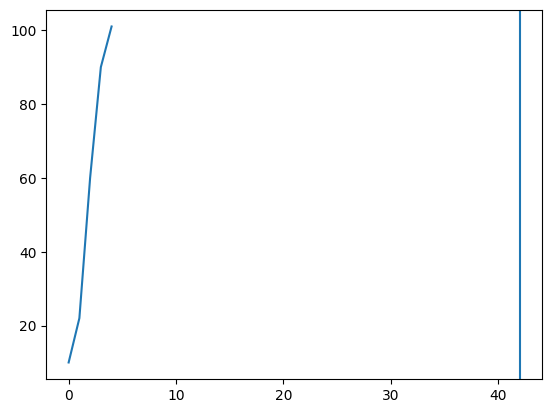

In [84]:
plt.plot(res.I)
plt.axvline(42)

In [6]:
#!pip install -e git+https://github.com/Mpkosh/Mathematics-of-Epidemics-on-Networks.git@my_changes#egg=eon

In [24]:
np.mean(d.values)

np.float64(6.750587151368459)

6.750587151368459 0.30343096163838584


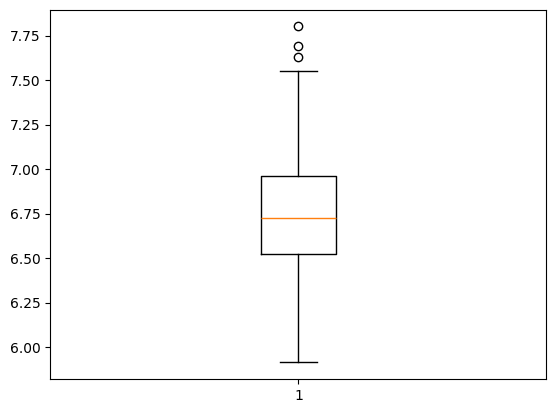

In [20]:
d = pd.read_csv('../sim_data/time_ba_50000.csv', index_col=0)
print(d.mean().values[0], d.std().values[0])
plt.boxplot(d);

4.644698191642761 0.2082108419984864


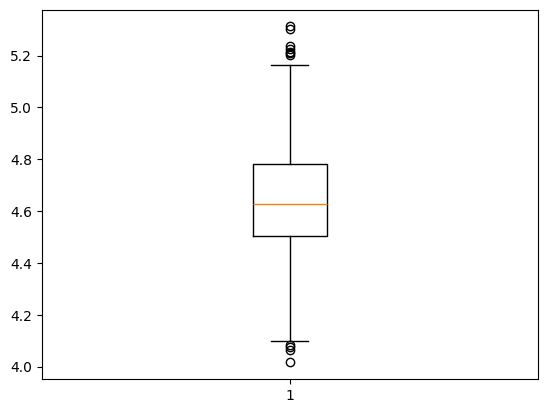

In [16]:
d = pd.read_csv('../sim_data/time_r_50000.csv', index_col=0)
print(d.mean().values[0], d.std().values[0])
plt.boxplot(d);

9.87371572526296 0.42109058952559886


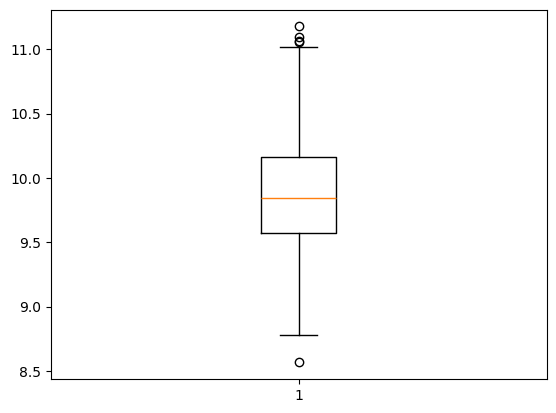

In [17]:
d = pd.read_csv('../sim_data/time_r_100000.csv', index_col=0)
print(d.mean().values[0], d.std().values[0])
plt.boxplot(d);

0.6158949613571167 0.07661610764009413


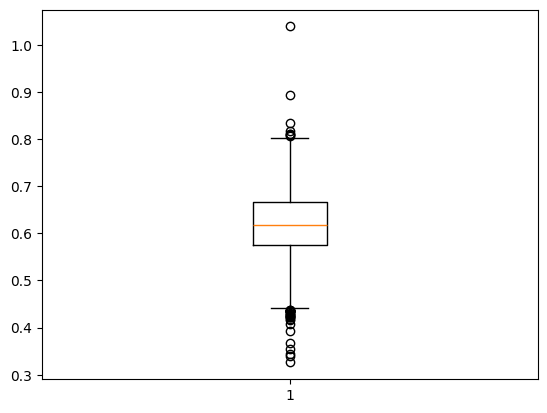

In [18]:
d = pd.read_csv('../sim_data/time_sw_10000.csv', index_col=0)
print(d.mean().values[0], d.std().values[0])
plt.boxplot(d);

8.196330868085225 0.9060726008717347


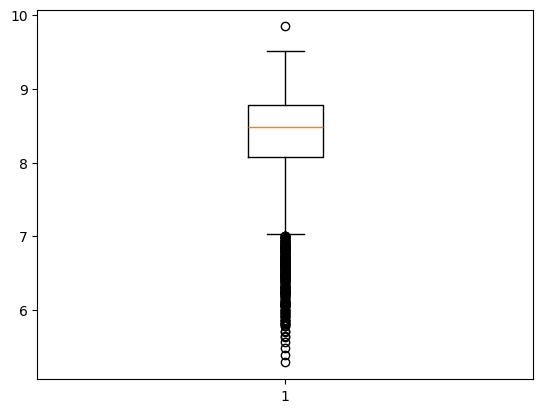

In [19]:
d = pd.read_csv('../sim_data/time_sw_100000.csv', index_col=0)
print(d.mean().values[0], d.std().values[0])
plt.boxplot(d);

In [3]:
def save_seir_df(res, pop, ntype, seed,
                 beta, gamma, delta,
                 init_inf_frac, init_rec_frac):
    seed_df = pd.DataFrame([res.S, res.E, 
                        res.I, res.R]).T
    seed_df.columns = ['S','E','I','R']
    # use "values", because "iloc" saves index info 
    # and messes with calculation
    beta_calc = - seed_df.S.diff().values[1:] / (
                            seed_df.S.values[:-1] * seed_df.I.values[:-1]
                            )
    # the last Beta value cannot be calculated: no S_{t+1}
    seed_df['Beta'] = [*beta_calc, 0] 
    seed_df.fillna(0, inplace=True)
    
    params = [beta, gamma, delta, init_inf_frac, init_rec_frac]
    params_str = '_'.join([str(i) for i in params])
    
    seed_dir = f'../sim_data/new_{ntype}_{pop}/'
    if not os.path.exists(seed_dir):
        os.makedirs(seed_dir)
    seed_df.to_csv(seed_dir + f'p_{params_str}_seed_{seed}.csv', 
                   index=False)

In [17]:
tmax = 250 # time in days for simulation
columns = ['beta', 'gamma', 'delta', 
           'init_inf_frac', 'init_rec_frac']+ \
          [day_index for day_index in range(tmax)]
dataset = pd.DataFrame(columns=columns)

pop = 1000
ntype = 'ba'
chosen_seed = np.random.RandomState(42)
network_model = SEIRNetworkModel(pop, ntype, chosen_seed)

gamma = 0.1 # rate: E -> I
delta = 0.08 # recovery rate: I -> R


# transmission rate
beta_arr = np.arange(0.04, 0.09, 0.01)
# fraction of initially infected
init_inf_frac = 0.01 #np.arange(0.005, 0.011, 0.001)
# fraction of initial non-immune array
alpha_arr = np.arange(0.2, 1, 0.01) 

beta_arr = [0.04]
alpha_arr = [0.8]

n_runs = 10
times = []
for beta in tqdm.tqdm(beta_arr):
    for alpha in alpha_arr:
        for seed in range(n_runs):
            start_time = time.time()
            res = network_model.simulate(beta=beta, gamma=gamma, 
                                         delta=delta, 
                                         init_inf_frac=init_inf_frac, 
                                         init_rec_frac=1-alpha,
                                         tmax=tmax)
            end_time = time.time()
            times.append(end_time-start_time)
            sample = [beta, gamma, delta, 
                      init_inf_frac, alpha] + res.daily_incidence
            dataset.loc[len(dataset)] = sample

            save_seir_df(res, pop, ntype, seed,
                         beta, gamma, delta,
                         init_inf_frac, alpha)

ba


  0%|          | 0/1 [00:00<?, ?it/s]C:\Users\user\AppData\Local\Temp\ipykernel_9744\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\user\AppData\Local\Temp\ipykernel_9744\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\user\AppData\Local\Temp\ipykernel_9744\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\user\AppData\Local\Temp\ipykernel_9744\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\user\AppData\Local\Temp\ipykernel_9744\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\user\AppData\Local\Temp\ipykernel_9744\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_

In [18]:
np.arange(0.2, 1, 0.01) 

array([0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ,
       0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41,
       0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52,
       0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63,
       0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74,
       0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85,
       0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96,
       0.97, 0.98, 0.99])

In [19]:
np.arange(0.04, 0.09, 0.01)

array([0.04, 0.05, 0.06, 0.07, 0.08])

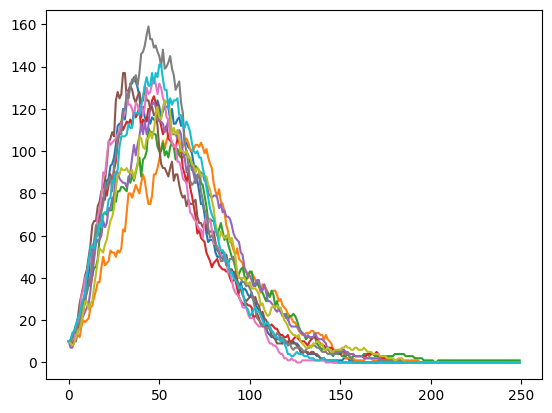

In [20]:
files = glob.glob('../sim_data/new_ba_1000/*.csv')

for i in files:
    df = pd.read_csv(i)
    plt.plot(df.I)

## times?

In [3]:
tmax = 250 # time in days for simulation
columns = ['beta', 'gamma', 'delta', 
           'init_inf_frac', 'init_rec_frac']+ \
          [day_index for day_index in range(tmax)]
dataset = pd.DataFrame(columns=columns)

pop = 1000
ntype = 'ba'
chosen_seed = np.random.RandomState(42)
network_model = SEIRNetworkModel(pop, ntype, chosen_seed)

sigma = 0.1 # rate: E -> I
gamma = 0.08 # recovery rate: I -> R
# fraction of initially infected

# fraction of initially recovered
init_rec_frac = 0
# transmission rate
beta_arr = np.arange(0.04, 0.09, 0.01)
init_inf_frac_arr = np.arange(0.005, 0.011, 0.001)

n_runs = 5
times = []
for beta in tqdm.tqdm(beta_arr):
    for init_inf_frac in init_inf_frac_arr:
        for seed in range(n_runs):
            start_time = time.time()
            res = network_model.simulate(beta=beta, gamma=sigma, 
                                         delta=gamma, 
                                         init_inf_frac=init_inf_frac, 
                                         init_rec_frac=init_rec_frac,
                                         tmax=tmax)
            end_time = time.time()
            times.append(end_time-start_time)
            sample = [beta, gamma, delta, 
                      init_inf_frac, init_rec_frac] + res.daily_incidence
            dataset.loc[len(dataset)] = sample

            save_seir_df(res, pop, ntype, seed,
                         beta, gamma, delta,
                         init_inf_frac, init_rec_frac)

ba


  0%|          | 0/5 [00:00<?, ?it/s]C:\Users\user\AppData\Local\Temp\ipykernel_2556\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\user\AppData\Local\Temp\ipykernel_2556\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\user\AppData\Local\Temp\ipykernel_2556\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\user\AppData\Local\Temp\ipykernel_2556\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\user\AppData\Local\Temp\ipykernel_2556\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\user\AppData\Local\Temp\ipykernel_2556\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_

In [4]:
# 0.92 +- 0.23
np.array(times).mean(), np.array(times).std()

(np.float64(0.9195522650082906), np.float64(0.23322693974453418))

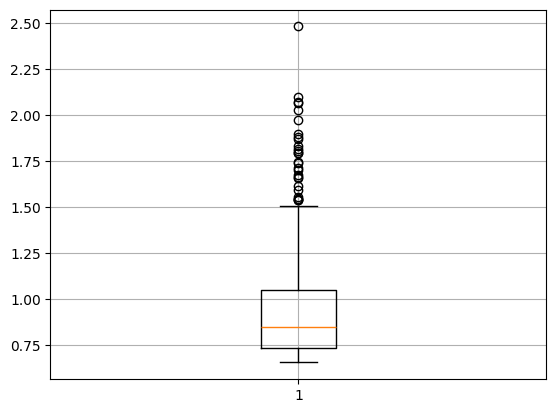

In [6]:
plt.boxplot(np.array(times));
plt.grid()

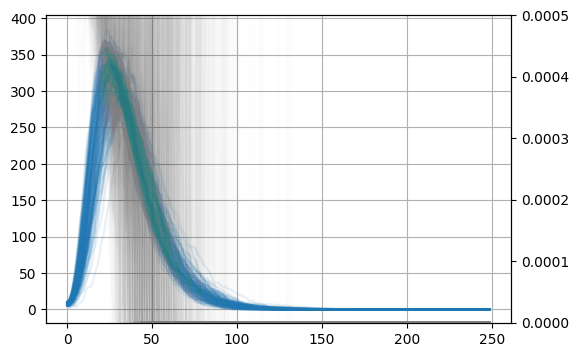

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax_beta = ax.twinx()

files = glob.glob('../sim_data/new_ba_1000/*.csv')
for file in files:
    df = pd.read_csv(file)
    ax.plot(df.I, color='tab:blue', alpha=0.1)
    ax_beta.plot(df.Beta, color='tab:gray', alpha=0.01)
    
ax_beta.set_ylim(-1e-6,5e-4)
ax.grid()

In [9]:
tmax = 250 # time in days for simulation
columns = ['beta', 'gamma', 'delta', 
           'init_inf_frac', 'init_rec_frac']+ \
          [day_index for day_index in range(tmax)]
dataset = pd.DataFrame(columns=columns)

pop = 10**5
ntype = 'ba'
chosen_seed = np.random.RandomState(42)
network_model = SEIRNetworkModel(pop, ntype, chosen_seed)

gamma = 0.1 # rate: E -> I
delta = 0.08 # recovery rate: I -> R
# fraction of initially infected

# fraction of initially recovered
init_rec_frac = 0
# transmission rate
beta_arr = np.arange(0.04, 0.09, 0.01)
init_inf_frac_arr = np.arange(0.005, 0.011, 0.001)

n_runs = 50
times = []
temp = 0
for beta in tqdm.tqdm(beta_arr):
    for init_inf_frac in init_inf_frac_arr:
        for seed in range(n_runs):
            temp += 1
            if temp > 1498:
                
                print(init_inf_frac, beta, seed)
                #start_time = time.time()
                
                res = network_model.simulate(beta=beta, gamma=gamma, 
                                             delta=delta, 
                                             init_inf_frac=init_inf_frac, 
                                             init_rec_frac=init_rec_frac,
                                             tmax=tmax)
                #end_time = time.time()
                #times.append(end_time-start_time)
                sample = [beta, gamma, delta, 
                          init_inf_frac, init_rec_frac] + res.daily_incidence
                dataset.loc[len(dataset)] = sample

                save_seir_df(res, pop, ntype, seed,
                             beta, gamma, delta,
                             init_inf_frac, init_rec_frac)
                

ba


  0%|          | 0/5 [00:00<?, ?it/s]

0.01 0.08000000000000002 48


C:\Users\105\AppData\Local\Temp\ipykernel_25824\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (


0.01 0.08000000000000002 49


C:\Users\105\AppData\Local\Temp\ipykernel_25824\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
100%|██████████| 5/5 [00:17<00:00,  3.53s/it]


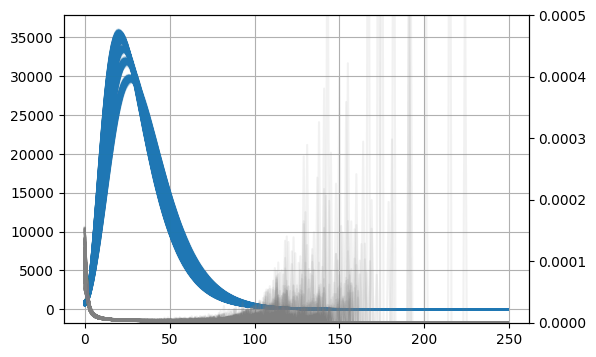

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax_beta = ax.twinx()

files = glob.glob('../sim_data/new_ba_100000/*.csv')
for file in files:
    df = pd.read_csv(file)
    ax.plot(df.I, color='tab:blue', alpha=0.1)
    ax_beta.plot(df.Beta, color='tab:gray', alpha=0.1)
    
ax_beta.set_ylim(-1e-6,5e-4)
ax.grid()

In [16]:
tmax = 250 # time in days for simulation
columns = ['beta', 'gamma', 'delta', 
           'init_inf_frac', 'init_rec_frac']+ \
          [day_index for day_index in range(tmax)]
dataset = pd.DataFrame(columns=columns)

pop = 10**4
ntype = 'sw'
chosen_seed = np.random.RandomState(42)
network_model = SEIRNetworkModel(pop, ntype, chosen_seed)

gamma = 0.1 # rate: E -> I
delta = 0.08 # recovery rate: I -> R
# fraction of initially infected

# fraction of initially recovered
init_rec_frac = 0
# transmission rate
beta_arr = np.arange(0.04, 0.09, 0.01)
init_inf_frac_arr = np.arange(0.005, 0.011, 0.001)

n_runs = 50
times = []
for beta in tqdm.tqdm(beta_arr):
    for init_inf_frac in init_inf_frac_arr:
        for seed in range(n_runs):
            start_time = time.time()
            res = network_model.simulate(beta=beta, gamma=gamma, 
                                         delta=delta, 
                                         init_inf_frac=init_inf_frac, 
                                         init_rec_frac=init_rec_frac,
                                         tmax=tmax)
            end_time = time.time()
            times.append(end_time-start_time)
            sample = [beta, gamma, delta, 
                      init_inf_frac, init_rec_frac] + res.daily_incidence
            dataset.loc[len(dataset)] = sample

            save_seir_df(res, pop, ntype, seed,
                         beta, gamma, delta,
                         init_inf_frac, init_rec_frac)

sw


 60%|██████    | 3/5 [04:45<03:15, 97.77s/it]C:\Users\105\AppData\Local\Temp\ipykernel_25824\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_25824\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_25824\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_25824\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_25824\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_25824\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc =

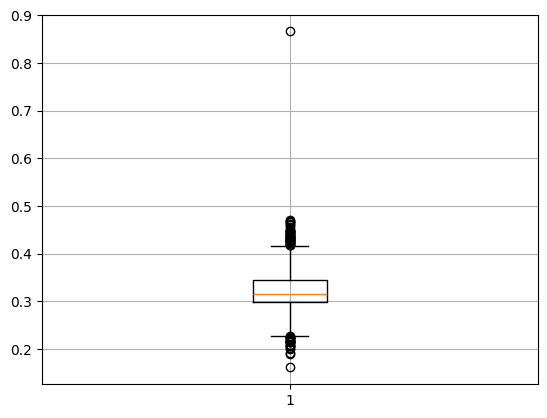

In [17]:
plt.boxplot(np.array(times));
plt.grid()

In [18]:
np.array(times).mean(), np.array(times).std()

(np.float64(0.3213739455540975), np.float64(0.04677628504342661))

(-1e-06, 0.0001)

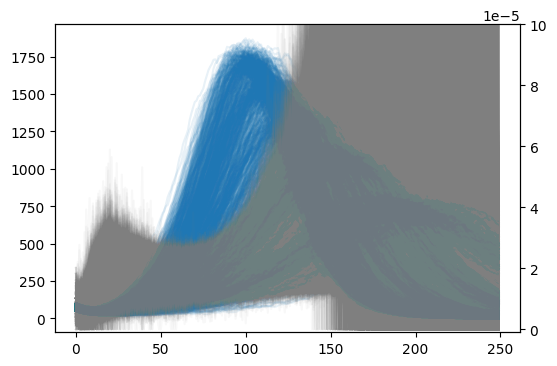

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax_beta = ax.twinx()

files = glob.glob('../sim_data/new_sw_10000/*.csv')
for file in files:
    df = pd.read_csv(file)
    ax.plot(df.I, color='tab:blue', alpha=0.1)
    ax_beta.plot(df.Beta, color='tab:gray', alpha=0.05)
    
ax_beta.set_ylim(-1e-6,1e-4)

In [19]:
tmax = 250 # time in days for simulation
columns = ['beta', 'gamma', 'delta', 
           'init_inf_frac', 'init_rec_frac']+ \
          [day_index for day_index in range(tmax)]
dataset = pd.DataFrame(columns=columns)

pop = 10**4
ntype = 'r'
chosen_seed = np.random.RandomState(42)
network_model = SEIRNetworkModel(pop, ntype, chosen_seed)

gamma = 0.1 # rate: E -> I
delta = 0.08 # recovery rate: I -> R
# fraction of initially infected

# fraction of initially recovered
init_rec_frac = 0
# transmission rate
beta_arr = np.arange(0.04, 0.09, 0.01)
init_inf_frac_arr = np.arange(0.005, 0.011, 0.001)

n_runs = 50
times = []
for beta in tqdm.tqdm(beta_arr):
    for init_inf_frac in init_inf_frac_arr:
        for seed in range(n_runs):
            start_time = time.time()
            res = network_model.simulate(beta=beta, gamma=gamma, 
                                         delta=delta, 
                                         init_inf_frac=init_inf_frac, 
                                         init_rec_frac=init_rec_frac,
                                         tmax=tmax)
            end_time = time.time()
            times.append(end_time-start_time)
            sample = [beta, gamma, delta, 
                      init_inf_frac, init_rec_frac] + res.daily_incidence
            dataset.loc[len(dataset)] = sample

            save_seir_df(res, pop, ntype, seed,
                         beta, gamma, delta,
                         init_inf_frac, init_rec_frac)

r


  0%|          | 0/5 [00:00<?, ?it/s]C:\Users\105\AppData\Local\Temp\ipykernel_25824\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_25824\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_25824\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_25824\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_25824\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_25824\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_

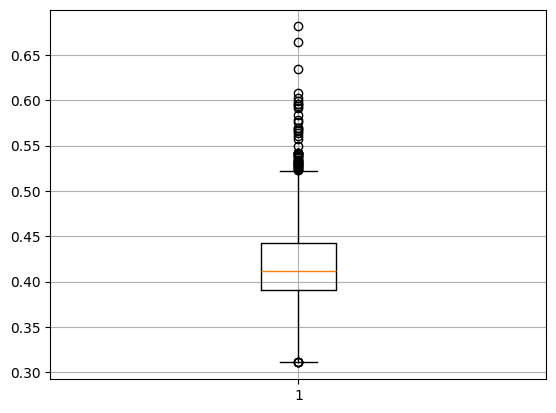

In [20]:
plt.boxplot(np.array(times));
plt.grid()

In [21]:
np.array(times).mean(), np.array(times).std()

(np.float64(0.41765787251790365), np.float64(0.05023144021161702))

(-1e-06, 0.0001)

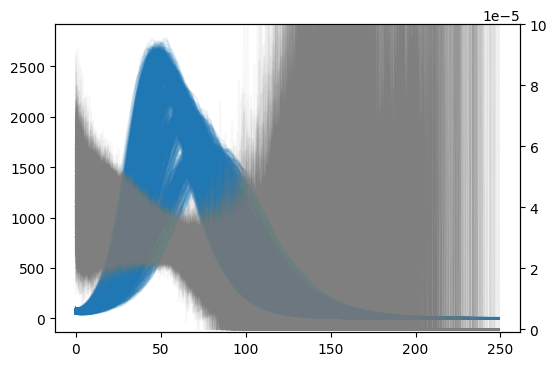

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax_beta = ax.twinx()

files = glob.glob('../sim_data/new_r_10000/*.csv')
for file in files:
    df = pd.read_csv(file)
    ax.plot(df.I, color='tab:blue', alpha=0.1)
    ax_beta.plot(df.Beta, color='tab:gray', alpha=0.05)
    
ax_beta.set_ylim(-1e-6,1e-4)

In [33]:
def create_all(ntype = 'r', pop = 10**4):
    tmax = 250 # time in days for simulation
    columns = ['beta', 'gamma', 'delta', 
               'init_inf_frac', 'init_rec_frac']+ \
              [day_index for day_index in range(tmax)]
    dataset = pd.DataFrame(columns=columns)
    
    
    chosen_seed = np.random.RandomState(42)
    network_model = SEIRNetworkModel(pop, ntype, chosen_seed)

    gamma = 0.1 # rate: E -> I
    delta = 0.08 # recovery rate: I -> R
    # fraction of initially infected

    # fraction of initially recovered
    init_rec_frac = 0
    # transmission rate
    beta_arr = np.arange(0.04, 0.09, 0.01)
    init_inf_frac_arr = np.arange(0.005, 0.011, 0.001)

    n_runs = 50
    times = []
    for beta in tqdm.tqdm(beta_arr):
        for init_inf_frac in init_inf_frac_arr:
            for seed in range(n_runs):
                start_time = time.time()
                res = network_model.simulate(beta=beta, gamma=gamma, 
                                             delta=delta, 
                                             init_inf_frac=init_inf_frac, 
                                             init_rec_frac=init_rec_frac,
                                             tmax=tmax)
                end_time = time.time()
                times.append(end_time-start_time)
                sample = [beta, gamma, delta, 
                          init_inf_frac, init_rec_frac] + res.daily_incidence
                dataset.loc[len(dataset)] = sample

                save_seir_df(res, pop, ntype, seed,
                             beta, gamma, delta,
                             init_inf_frac, init_rec_frac)
    return times

In [34]:
ba50 = create_all(ntype = 'ba', pop = 5*10**4)

ba


  0%|          | 0/5 [00:00<?, ?it/s]C:\Users\105\AppData\Local\Temp\ipykernel_25824\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_25824\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_25824\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_25824\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_25824\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_25824\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_

4.594253464221954 0.5143747769046652


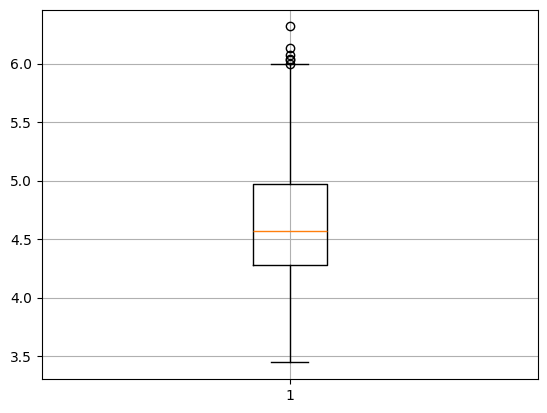

In [36]:
print(np.array(ba50).mean(), np.array(ba50).std())
plt.boxplot(np.array(ba50));
plt.grid()

In [37]:
sw50 = create_all(ntype = 'sw', pop = 5*10**4)

sw


 80%|████████  | 4/5 [45:11<11:48, 708.07s/it]C:\Users\105\AppData\Local\Temp\ipykernel_25824\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_25824\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_25824\4213419789.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
100%|██████████| 5/5 [57:55<00:00, 695.06s/it]


2.311915810902913 0.3464962046740828


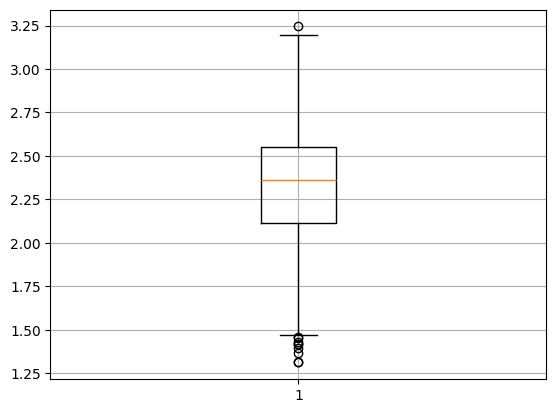

In [38]:
print(np.array(sw50).mean(), np.array(sw50).std())
plt.boxplot(np.array(sw50));
plt.grid()

## old

(-1e-06, 0.0001)

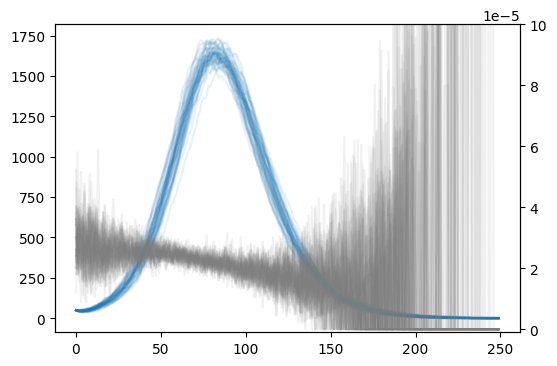

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax_beta = ax.twinx()

files = glob.glob('../sim_data/new_r_10000/*.csv')
for file in files:
    df = pd.read_csv(file)
    ax.plot(df.I, color='tab:blue', alpha=0.1)
    ax_beta.plot(df.Beta, color='tab:gray', alpha=0.1)
    
ax_beta.set_ylim(-1e-6,1e-4)

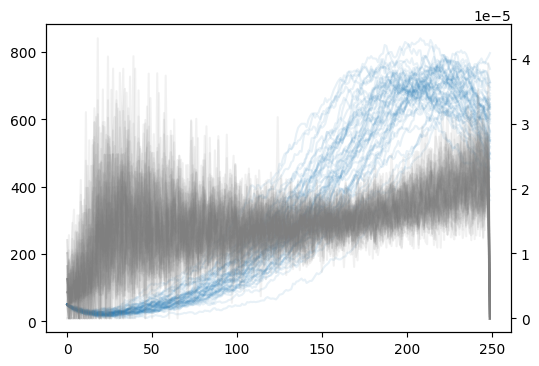

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax_beta = ax.twinx()

files = glob.glob('../sim_data/new_sw_10000/*.csv')
for file in files:
    df = pd.read_csv(file)
    ax.plot(df.I, color='tab:blue', alpha=0.1)
    ax_beta.plot(df.Beta, color='tab:gray', alpha=0.1)

In [87]:
tmax = 250 # time in days for simulation
columns = ['beta', 'gamma', 'delta', 
           'init_inf_frac', 'init_rec_frac']+ \
          [day_index for day_index in range(tmax)]
dataset = pd.DataFrame(columns=columns)


pop = 10**4
ntype = 'ba'
network_model = SEIRNetworkModel(pop, ntype)

gamma = 0.1 # rate: E -> I
delta = 0.1 # recovery rate: I -> R
# fraction of initially infected
init_inf_frac = 0.005 

# fraction of initially recovered
init_rec_frac_arr = np.arange(0, 0.3, 0.05)
# transmission rate
beta_arr = np.arange(0.1, 1., 0.05)
n_runs = 15

for beta in tqdm.tqdm(beta_arr):
    for init_rec_frac in init_rec_frac_arr:
        for seed in range(n_runs):
            res = network_model.simulate(beta=beta, gamma=gamma, 
                                         delta=delta, 
                                         init_inf_frac=init_inf_frac, 
                                         init_rec_frac=init_rec_frac,
                                         tmax=tmax)
            sample = [beta, gamma, delta, 
                      init_inf_frac, init_rec_frac] + res.daily_incidence
            dataset.loc[len(dataset)] = sample

            save_seir_df(res, pop, ntype, seed,
                         beta, gamma, delta,
                         init_inf_frac, init_rec_frac)

  0%|          | 0/18 [00:00<?, ?it/s]C:\Users\105\AppData\Local\Temp\ipykernel_9624\1064361097.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_9624\1064361097.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_9624\1064361097.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_9624\1064361097.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_9624\1064361097.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.diff().values[1:] / (
C:\Users\105\AppData\Local\Temp\ipykernel_9624\1064361097.py:9: RuntimeWarning: invalid value encountered in divide
  beta_calc = - seed_df.S.

In [3]:
np.arange(0.1, 1., 0.05)

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

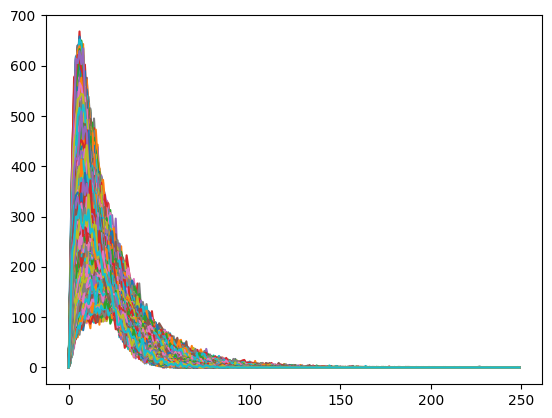

In [88]:
for i in range(dataset.shape[0]):
    plt.plot(dataset.values[i][5:])

In [90]:
dataset.values[i][5:].argmax()

np.int64(6)